In [64]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.utils import plot_model

In [2]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

## Creating data to view and fit

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

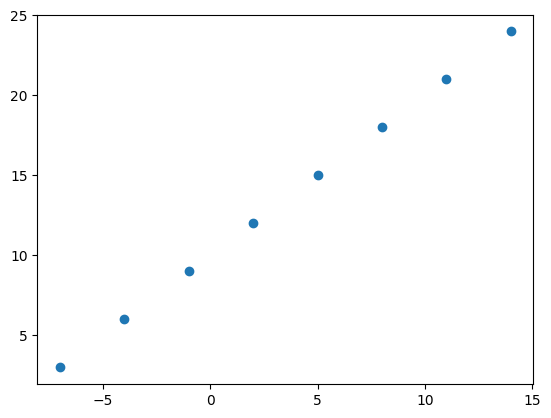

In [4]:
# Visualize
plt.scatter(X, Y)

In [5]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modeling with tensorflow

1. Creating a model: Define input and output laters as well as the hidden layers
2. Compiling a model: Define loss function,  optimizer (how to improve the learning) and evaluation metrics.
3. Fitting a model: Find the patterns.

In [7]:
# Set random seed
tf.random.set_seed(42)

In [8]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,      # MAE: Mean absolote error
             optimizer=tf.keras.optimizers.SGD(), # SGD: Stochastic gradient descent
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 15.8329 - mae: 15.8329
Epoch 2/5
1/1 [==============================] - 0s 56ms/step - loss: 15.5516 - mae: 15.5516
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 15.2704 - mae: 15.2704
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 14.9891 - mae: 14.9891
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 14.7902 - mae: 14.7902


In [9]:
# Check prediction
model.predict([17.0])

1/1 [==============================] - 1s 536ms/step


array([[-5.777615]], dtype=float32)

## Improve the model

1. Create a model: Add more layers, increase the number of hidden units (neurons) within layers, change activation function of each layer.
2. Compile the model: Change optimization, change the learning rate of optimization function.
3. Fit the model: Change epochs (look at the data more times). Feed more data to train.

In [10]:
# Rebuild the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 10.3174 - mae: 10.3174
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1849 - mae: 10.1849
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 10.0524 - mae: 10.0524
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 9.9199 - mae: 9.9199
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 9.7874 - mae: 9.7874
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 9.6549 - mae: 9.6549
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 9.5224 - mae: 9.5224
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 9.3899 - mae: 9.3899
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 9.2574 - mae: 9.2574
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 9.1249 - mae: 9.1249
Epoch 11/100
1/1 [==============================] - 0s 20ms/step 

1/1 [==============================] - 0s 24ms/step - loss: 6.9675 - mae: 6.9675
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9619 - mae: 6.9619
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9563 - mae: 6.9563
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9506 - mae: 6.9506
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9450 - mae: 6.9450
Epoch 93/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9394 - mae: 6.9394
Epoch 94/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9338 - mae: 6.9338
Epoch 95/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9281 - mae: 6.9281
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9225 - mae: 6.9225
Epoch 97/100
1/1 [==============================] - 0s 20ms/step - loss: 6.9169 - mae: 6.9169
Epoch 98/100
1/1 [==============================] - 0s 16ms/step - loss: 

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 164ms/step


array([[29.950762]], dtype=float32)

In [12]:
# Trying another change: Extra layer with 100 hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.0369 - mae: 12.0369
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 11.3358 - mae: 11.3358
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 10.6387 - mae: 10.6387
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 9.9438 - mae: 9.9438
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 9.2489 - mae: 9.2489
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 8.5516 - mae: 8.5516
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.8492 - mae: 7.8492
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 7.1387 - mae: 7.1387
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 6.9400 - mae: 6.9400
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.2455 - mae: 7.2455
Epoch 11/100
1/1 [==============================] - 0s 20ms/step 

1/1 [==============================] - 0s 20ms/step - loss: 0.5357 - mae: 0.5357
Epoch 89/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6562 - mae: 0.6562
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4766 - mae: 0.4766
Epoch 91/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3514 - mae: 0.3514
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4535 - mae: 0.4535
Epoch 93/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3994 - mae: 0.3994
Epoch 94/100
1/1 [==============================] - 0s 16ms/step - loss: 0.1519 - mae: 0.1519
Epoch 95/100
1/1 [==============================] - 0s 12ms/step - loss: 0.3096 - mae: 0.3096
Epoch 96/100
1/1 [==============================] - 0s 20ms/step - loss: 0.3874 - mae: 0.3874
Epoch 97/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2814 - mae: 0.2814
Epoch 98/100
1/1 [==============================] - 0s 20ms/step - loss: 

In [13]:
# Might be overfitting, since the metrics is better, but the predicion deviates more than the previous test 
model.predict([17.0])

1/1 [==============================] - 0s 250ms/step


array([[26.785107]], dtype=float32)

## Evaluating a model

"Visualize, visualize, visualize"

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [15]:
# Make labels
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

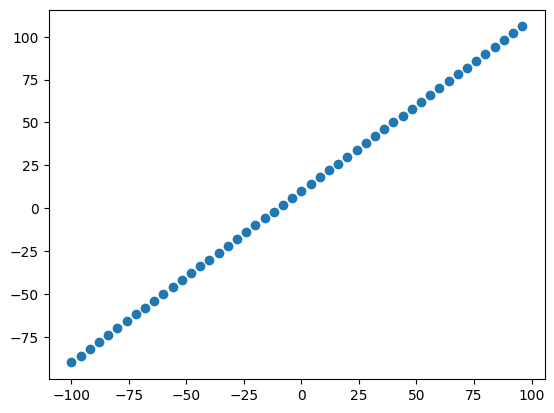

In [16]:
# Visualize the data
plt.scatter(X, Y)

In [17]:
# Split the data in train/test
X_train = X[:40]
Y_train = Y[:40]
X_test = X[40:]
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

## Visualizing the data

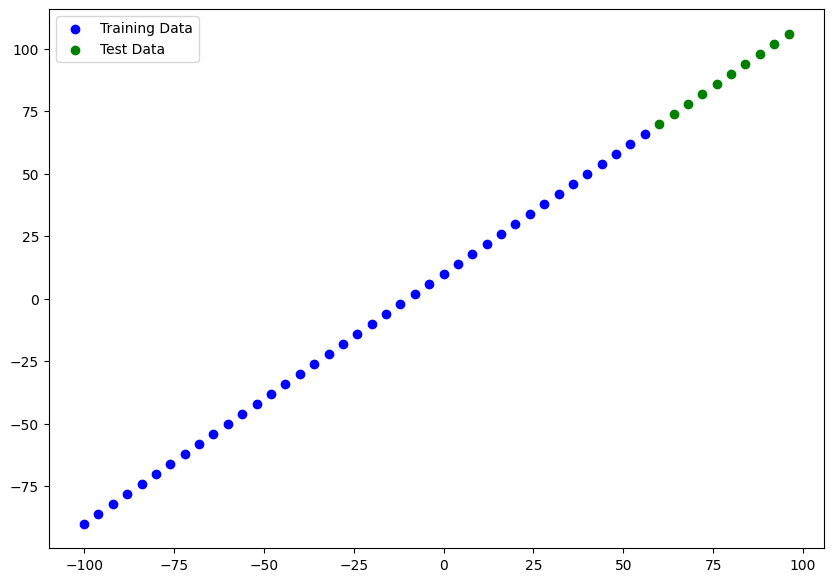

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, Y_train, c='b', label='Training Data')
plt.scatter(X_test, Y_test, c='g', label='Test Data')
plt.legend()
plt.show()

In [19]:
# Neural network for our data
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='Input_Layer'),
    tf.keras.layers.Dense(1, name='Output_Layer'),
], name='model_1')
# Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mae'])  
# Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 16ms/step - loss: 61.6211 - mae: 61.6211
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 54.6534 - mae: 54.6534
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 47.9948 - mae: 47.9948
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 41.1999 - mae: 41.1999
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 34.5475 - mae: 34.5475
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 27.9287 - mae: 27.9287
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 21.1813 - mae: 21.1813
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 14.5035 - mae: 14.5035
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 9.1847 - mae: 9.1847
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 9.1625 - mae: 9.1625
Epoch 11/100
2/2 [==============================] - 0

2/2 [==============================] - 0s 16ms/step - loss: 1.0115 - mae: 1.0115
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 1.0556 - mae: 1.0556
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 0.7296 - mae: 0.7296
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 0.8878 - mae: 0.8878
Epoch 92/100
2/2 [==============================] - 0s 0s/step - loss: 1.0635 - mae: 1.0635
Epoch 93/100
2/2 [==============================] - 0s 0s/step - loss: 1.1722 - mae: 1.1722
Epoch 94/100
2/2 [==============================] - 0s 16ms/step - loss: 1.0135 - mae: 1.0135
Epoch 95/100
2/2 [==============================] - 0s 16ms/step - loss: 1.0138 - mae: 1.0138
Epoch 96/100
2/2 [==============================] - 0s 16ms/step - loss: 1.3525 - mae: 1.3525
Epoch 97/100
2/2 [==============================] - 0s 16ms/step - loss: 1.5033 - mae: 1.5033
Epoch 98/100
2/2 [==============================] - 0s 0s/step - loss: 0.6838

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**- Dense layer: Fully connected layers, ie all neurons from each layer connect to all neurons on the next.**  
**- Non-trainable params: When getting a pre-trained model sometimes we may want to "freeze" some parameters.**

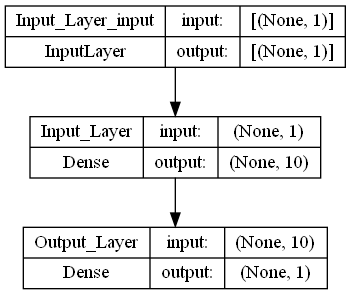

In [21]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Visualizing predictions

In [22]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 141ms/step


array([[ 72.00645 ],
       [ 76.12808 ],
       [ 80.24973 ],
       [ 84.37137 ],
       [ 88.49302 ],
       [ 92.61467 ],
       [ 96.736305],
       [100.85794 ],
       [104.9796  ],
       [109.10124 ]], dtype=float32)

In [23]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [24]:
# Plotting function
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=Y_pred):
    """
    Plots training data, test data and compare predictions to ground truth labels
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Test Data')
    
    # Plot model's predictions
    plt.scatter(test_data, predictions, c='r', label='Prediction')
    # Show legend
    plt.legend()
    plt.show()

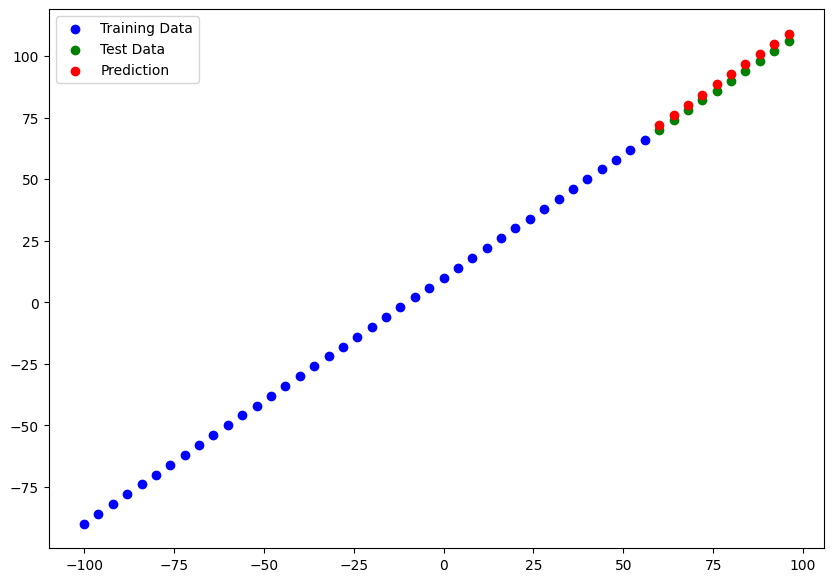

In [25]:
plot_predictions()

## Evaluating the model

In [26]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 391ms/step - loss: 2.5538 - mae: 2.5538


[2.553835391998291, 2.553835391998291]

In [27]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5538406>

In [28]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=6.6441793>

In [38]:
# Make some functions for mse and mae
def mae(Y_true, Y_pred):
    return tf.metrics.mean_absolute_error(y_true=Y_true, y_pred=tf.squeeze(Y_pred))

def mse(Y_true, Y_pred):
    return tf.metrics.mean_squared_error(y_true=Y_true, y_pred=tf.squeeze(Y_pred))

## Experiments to improve the model

In [30]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

**Modeling experiments:**
- Same original model, 1 layer, 100 epochs
- 2 layers, 100 epochs
- 2 layers, 500 epochs

In [31]:
# Setting the seed
tf.random.set_seed(42)

In [33]:
# Model 1
# Definition
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile
model_1.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# Fit
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 24ms/step - loss: 8.5783 - mae: 8.5783
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 10.4287 - mae: 10.4287
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 10.8430 - mae: 10.8430
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 9.4521 - mae: 9.4521
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3450 - mae: 10.3450
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.5856 - mae: 9.5856
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 8.6995 - mae: 8.6995
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 9.0505 - mae: 9.0505
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 19.0839 - mae: 19.0839
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2957 - mae: 10.2957
Epoch 11/100
2/2 [==============================] - 0s 8ms/

2/2 [==============================] - 0s 12ms/step - loss: 13.1817 - mae: 13.1817
Epoch 88/100
2/2 [==============================] - 0s 12ms/step - loss: 11.5066 - mae: 11.5066
Epoch 89/100
2/2 [==============================] - 0s 12ms/step - loss: 7.7946 - mae: 7.7946
Epoch 90/100
2/2 [==============================] - 0s 12ms/step - loss: 10.9204 - mae: 10.9204
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 6.7402 - mae: 6.7402
Epoch 92/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1129 - mae: 10.1129
Epoch 93/100
2/2 [==============================] - 0s 12ms/step - loss: 7.5995 - mae: 7.5995
Epoch 94/100
2/2 [==============================] - 0s 12ms/step - loss: 9.2315 - mae: 9.2315
Epoch 95/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8213 - mae: 10.8213
Epoch 96/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2868 - mae: 10.2868
Epoch 97/100
2/2 [==============================] - 0s 12ms/s

1/1 [==============================] - 0s 136ms/step


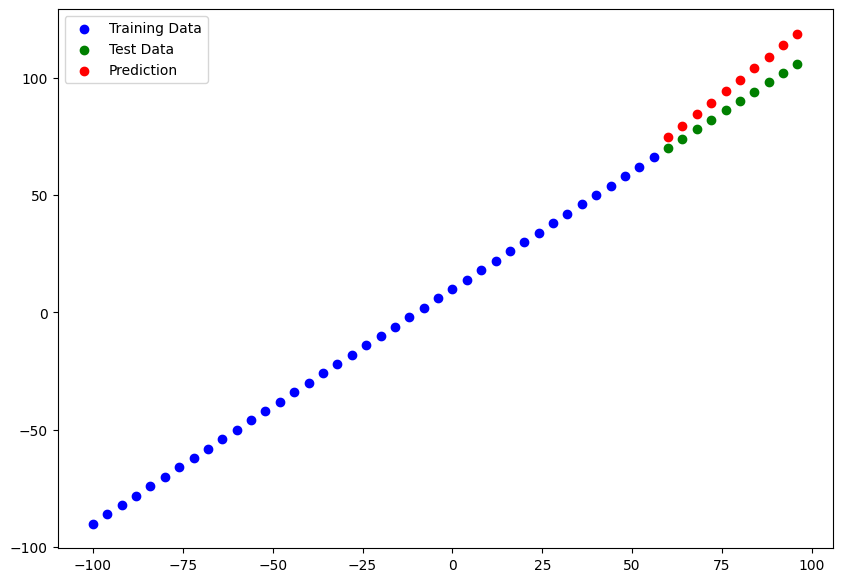

In [34]:
Y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_preds_1)

In [39]:
# Calculate model 1 evaluation metrics
mae_1 = mae(Y_test, Y_preds_1)
mse_1 = mse(Y_test, Y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.655555>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.44352>)

In [40]:
tf.random.set_seed(42)

In [41]:
# Model 2 (just to experiment, the metrics on compile will be mse instead of mae)
# Definition
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile
model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mse'])
# Fit
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 83.6280 - mse: 10687.9873
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 27.9745 - mse: 1213.4744
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 20.7658 - mse: 633.5209
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 13.3824 - mse: 242.3190
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 17.5275 - mse: 413.3193
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 10.2504 - mse: 120.5474
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 11.2231 - mse: 152.4560
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 11.1398 - mse: 161.1791
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 40.6785 - mse: 2613.6421
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 28.0415 - mse: 1108.4141
Epoch 11/100
2/2 [====================

2/2 [==============================] - 0s 0s/step - loss: 14.9647 - mse: 312.7437
Epoch 86/100
2/2 [==============================] - 0s 16ms/step - loss: 15.2896 - mse: 315.6199
Epoch 87/100
2/2 [==============================] - 0s 16ms/step - loss: 19.1047 - mse: 521.0304
Epoch 88/100
2/2 [==============================] - 0s 16ms/step - loss: 29.8424 - mse: 1288.9980
Epoch 89/100
2/2 [==============================] - 0s 16ms/step - loss: 10.2031 - mse: 124.6507
Epoch 90/100
2/2 [==============================] - 0s 16ms/step - loss: 21.5277 - mse: 664.1969
Epoch 91/100
2/2 [==============================] - 0s 16ms/step - loss: 10.5960 - mse: 162.3078
Epoch 92/100
2/2 [==============================] - 0s 16ms/step - loss: 18.3931 - mse: 463.8105
Epoch 93/100
2/2 [==============================] - 0s 16ms/step - loss: 7.4354 - mse: 82.5532
Epoch 94/100
2/2 [==============================] - 0s 0s/step - loss: 17.7243 - mse: 444.9835
Epoch 95/100
2/2 [==============================

1/1 [==============================] - 0s 172ms/step


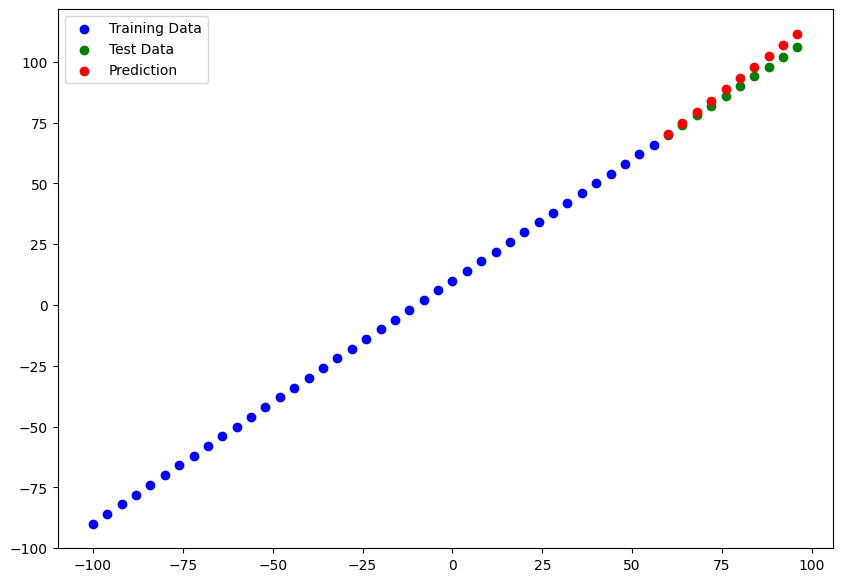

In [42]:
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [43]:
# Calculate model 1 evaluation metrics
mae_2 = mae(Y_test, Y_preds_2)
mse_2 = mse(Y_test, Y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9700813>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.577646>)

In [49]:
tf.random.set_seed(42)

In [50]:
# Model 3 (just to experiment, the metrics on compile will be mse instead of mae)
# Definition
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile
model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# Fit
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 16ms/step - loss: 11.2526 - mae: 11.2526
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 30.5441 - mae: 30.5441
Epoch 3/500
2/2 [==============================] - 0s 15ms/step - loss: 28.1501 - mae: 28.1501
Epoch 4/500
2/2 [==============================] - 0s 15ms/step - loss: 15.6938 - mae: 15.6938
Epoch 5/500
2/2 [==============================] - 0s 15ms/step - loss: 21.7477 - mae: 21.7477
Epoch 6/500
2/2 [==============================] - 0s 15ms/step - loss: 11.2737 - mae: 11.2737
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 12.3342 - mae: 12.3342
Epoch 8/500
2/2 [==============================] - 0s 20ms/step - loss: 10.9925 - mae: 10.9925
Epoch 9/500
2/2 [==============================] - 0s 26ms/step - loss: 38.9626 - mae: 38.9626
Epoch 10/500
2/2 [==============================] - 0s 16ms/step - loss: 26.5527 - mae: 26.5527
Epoch 11/500
2/2 [==============================]

2/2 [==============================] - 0s 12ms/step - loss: 15.3373 - mae: 15.3373
Epoch 87/500
2/2 [==============================] - 0s 12ms/step - loss: 19.2081 - mae: 19.2081
Epoch 88/500
2/2 [==============================] - 0s 12ms/step - loss: 29.5643 - mae: 29.5643
Epoch 89/500
2/2 [==============================] - 0s 8ms/step - loss: 10.1444 - mae: 10.1444
Epoch 90/500
2/2 [==============================] - 0s 16ms/step - loss: 21.3099 - mae: 21.3099
Epoch 91/500
2/2 [==============================] - 0s 12ms/step - loss: 10.5275 - mae: 10.5275
Epoch 92/500
2/2 [==============================] - 0s 12ms/step - loss: 18.2045 - mae: 18.2045
Epoch 93/500
2/2 [==============================] - 0s 12ms/step - loss: 6.8159 - mae: 6.8159
Epoch 94/500
2/2 [==============================] - 0s 12ms/step - loss: 13.0091 - mae: 13.0091
Epoch 95/500
2/2 [==============================] - 0s 20ms/step - loss: 18.3906 - mae: 18.3906
Epoch 96/500
2/2 [==============================] - 0s 2

2/2 [==============================] - 0s 0s/step - loss: 17.8594 - mae: 17.8594
Epoch 172/500
2/2 [==============================] - 0s 16ms/step - loss: 29.2930 - mae: 29.2930
Epoch 173/500
2/2 [==============================] - 0s 16ms/step - loss: 16.8952 - mae: 16.8952
Epoch 174/500
2/2 [==============================] - 0s 16ms/step - loss: 11.1824 - mae: 11.1824
Epoch 175/500
2/2 [==============================] - 0s 16ms/step - loss: 27.4693 - mae: 27.4693
Epoch 176/500
2/2 [==============================] - 0s 16ms/step - loss: 8.4152 - mae: 8.4152
Epoch 177/500
2/2 [==============================] - 0s 0s/step - loss: 9.3754 - mae: 9.3754
Epoch 178/500
2/2 [==============================] - 0s 16ms/step - loss: 18.5091 - mae: 18.5091
Epoch 179/500
2/2 [==============================] - 0s 16ms/step - loss: 10.4413 - mae: 10.4413
Epoch 180/500
2/2 [==============================] - 0s 0s/step - loss: 7.9821 - mae: 7.9821
Epoch 181/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 16ms/step - loss: 12.3903 - mae: 12.3903
Epoch 257/500
2/2 [==============================] - 0s 0s/step - loss: 10.5609 - mae: 10.5609
Epoch 258/500
2/2 [==============================] - 0s 16ms/step - loss: 14.1806 - mae: 14.1806
Epoch 259/500
2/2 [==============================] - 0s 16ms/step - loss: 11.2469 - mae: 11.2469
Epoch 260/500
2/2 [==============================] - 0s 16ms/step - loss: 31.5879 - mae: 31.5879
Epoch 261/500
2/2 [==============================] - 0s 16ms/step - loss: 11.1625 - mae: 11.1625
Epoch 262/500
2/2 [==============================] - 0s 16ms/step - loss: 10.0198 - mae: 10.0198
Epoch 263/500
2/2 [==============================] - 0s 16ms/step - loss: 8.9370 - mae: 8.9370
Epoch 264/500
2/2 [==============================] - 0s 16ms/step - loss: 21.4898 - mae: 21.4898
Epoch 265/500
2/2 [==============================] - 0s 0s/step - loss: 11.4453 - mae: 11.4453
Epoch 266/500
2/2 [==============================]

2/2 [==============================] - 0s 0s/step - loss: 21.9461 - mae: 21.9461
Epoch 342/500
2/2 [==============================] - 0s 16ms/step - loss: 13.8489 - mae: 13.8489
Epoch 343/500
2/2 [==============================] - 0s 16ms/step - loss: 11.6944 - mae: 11.6944
Epoch 344/500
2/2 [==============================] - 0s 0s/step - loss: 10.6904 - mae: 10.6904
Epoch 345/500
2/2 [==============================] - 0s 16ms/step - loss: 30.9081 - mae: 30.9081
Epoch 346/500
2/2 [==============================] - 0s 16ms/step - loss: 10.6415 - mae: 10.6415
Epoch 347/500
2/2 [==============================] - 0s 16ms/step - loss: 25.5675 - mae: 25.5675
Epoch 348/500
2/2 [==============================] - 0s 16ms/step - loss: 13.2766 - mae: 13.2766
Epoch 349/500
2/2 [==============================] - 0s 16ms/step - loss: 13.0376 - mae: 13.0376
Epoch 350/500
2/2 [==============================] - 0s 16ms/step - loss: 15.4009 - mae: 15.4009
Epoch 351/500
2/2 [=============================

2/2 [==============================] - 0s 0s/step - loss: 20.2192 - mae: 20.2192
Epoch 427/500
2/2 [==============================] - 0s 16ms/step - loss: 6.2844 - mae: 6.2844
Epoch 428/500
2/2 [==============================] - 0s 16ms/step - loss: 12.9217 - mae: 12.9217
Epoch 429/500
2/2 [==============================] - 0s 16ms/step - loss: 10.7218 - mae: 10.7218
Epoch 430/500
2/2 [==============================] - 0s 16ms/step - loss: 11.3319 - mae: 11.3319
Epoch 431/500
2/2 [==============================] - 0s 16ms/step - loss: 10.5501 - mae: 10.5501
Epoch 432/500
2/2 [==============================] - 0s 16ms/step - loss: 11.3770 - mae: 11.3770
Epoch 433/500
2/2 [==============================] - 0s 16ms/step - loss: 11.3857 - mae: 11.3857
Epoch 434/500
2/2 [==============================] - 0s 16ms/step - loss: 30.4250 - mae: 30.4250
Epoch 435/500
2/2 [==============================] - 0s 0s/step - loss: 10.5042 - mae: 10.5042
Epoch 436/500
2/2 [==============================]

1/1 [==============================] - 0s 172ms/step


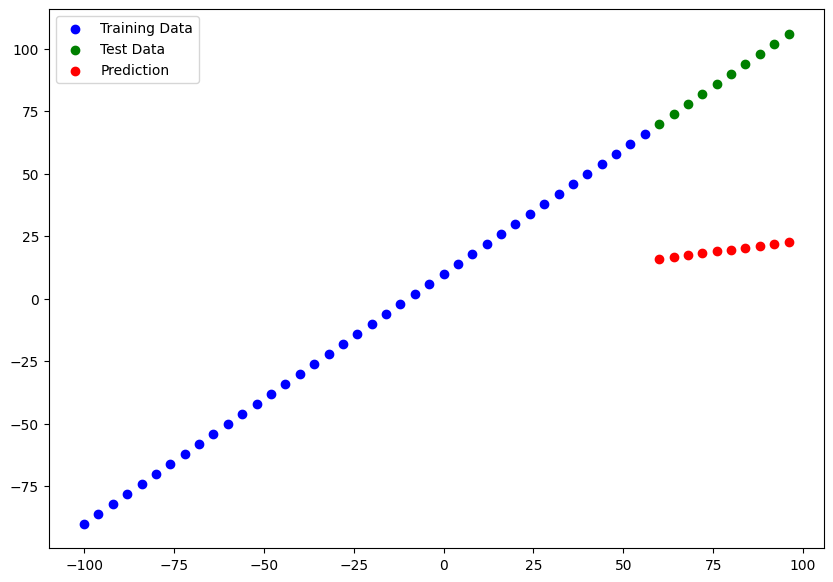

In [51]:
Y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_preds_3)

In [52]:
# Calculate model 3 evaluation metrics
mae_3 = mae(Y_test, Y_preds_3)
mse_3 = mse(Y_test, Y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.67484>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4802.6484>)

In [62]:
# Calculate model 3 training evaluation metrics
Y_preds_3_train = model_3.predict(X_train)

2/2 [==============================] - 0s 16ms/step


In [63]:
mae_3_train = mae(Y_train, Y_preds_3_train)
mse_3_train = mse(Y_train, Y_preds_3_train)
mae_3_train, mse_3_train

(<tf.Tensor: shape=(), dtype=float32, numpy=33.516678>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1545.4186>)

## Comparing the results

In [65]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])

In [66]:
all_results

,model,mae,mse
0,model_1,8.655555,81.443520
1,model_2,2.970081,11.577646
2,model_3,68.674843,4802.648438


**Model 2 performed better**

In [67]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking experiments
Tools to help:
- TensorBoard:  Library to help track experiments.
- Weights & Biases: Tool for tracking all kinds of ML experiments. (Plugs into TensorBoard)

## Saving our models

Two formats:
- The SavedModel format.
- The HDF5 format.

In [68]:
# Saving using SavedModel
model_2.save('best_model_SavedModel_format')

In [69]:
# Saving HDF5 (better for other cases outside the notebook)
model_2.save('best_model_HDF5_format.h5')

## Load saved models

In [70]:
# SavedModel
load_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
load_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compare model_2 predictions with loaded model
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = load_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 125ms/step


In [73]:
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# Loading the HDF5 format
loaded_h5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')

In [76]:
loaded_h5_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [77]:
loaded_h5_format_preds = loaded_h5_format.predict(X_test)

1/1 [==============================] - 0s 136ms/step


In [78]:
loaded_h5_format_preds == model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])